<a href="https://colab.research.google.com/github/naman065/Inter-IIT-PrepCamp/blob/main/VQFR_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VQFR Inference Demo

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2205.06803)
[![GitHub Stars](https://img.shields.io/github/stars/TencentARC/VQFR?style=social)](https://github.com/TencentARC/VQFR)
[![download](https://img.shields.io/github/downloads/TencentARC/VQFR/total.svg)](https://github.com/TencentARC/VQFR/releases)

## VQFR - Blind Face Restoration with Vector-Quantized Dictionary and Parallel Decoder

This paper aims at investigating the potential and limitation of Vector-Quantized (VQ) dictionary for blind face restoration.
We propose a new framework VQFR – incoporating the Vector-Quantized Dictionary and the Parallel Decoder. Compare with previous arts, VQFR produces more realistic facial details and keep the comparable fidelity.


**New Update: VQFR v2**: This version of VQFR emphasizes the restoration quality and balance the fidelity ratio with user control.

**VQFR v1** This version of VQFR used in the paper emphasizes more on the fidelity. We also planning to release a version emphasizing more on quality for real-world applications.

###Enjoy! :-)

<img src="https://ycgu.site/projects/vqfr/files/teaser.png" width="800">


# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [1]:
%cd /content
!rm -rf VQFR
!git clone https://github.com/TencentARC/VQFR.git
%cd VQFR
# Set up the environment

# Install other depencencies
!pip install -r requirements.txt

# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr

# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib

!VQFR_EXT=True python setup.py develop

!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
# Now we use the paper model for the demo
# !wget https://github.com/TencentARC/VQFR/releases/download/v1.0.0/VQFR_v1-33a1fac5.pth -P experiments/pretrained_models
!wget https://github.com/TencentARC/VQFR/releases/download/v2.0.0/VQFR_v2.pth -P experiments/pretrained_models

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('VQFR output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

/content
Cloning into 'VQFR'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 239 (delta 65), reused 200 (delta 42), pack-reused 0 (from 0)
Receiving objects: 100% (239/239), 10.02 MiB | 14.87 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/VQFR
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of opencv-python to determine which version is compatible with 

# 2. Demo for cropped & aligned faces

In [ ]:
import shutil
import os
upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.makedirs(upload_folder, exist_ok=True)
shutil.copytree('inputs/cropped_faces', 'inputs/upload/cropped_faces')

'inputs/upload/cropped_faces'

In [ ]:
# Now we use the VQFR to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
!rm -rf results
!python demo.py -i inputs/upload/cropped_faces -o results -v 2.0 -s 1 -f 0 --aligned

!ls results/cmp

Traceback (most recent call last):
  File "/content/VQFR/demo.py", line 7, in <module>
    from basicsr.utils import imwrite
  File "/usr/local/lib/python3.10/dist-packages/basicsr/__init__.py", line 4, in <module>
    from .data import *
  File "/usr/local/lib/python3.10/dist-packages/basicsr/data/__init__.py", line 22, in <module>
    _dataset_modules = [importlib.import_module(f'basicsr.data.{file_name}') for file_name in dataset_filenames]
  File "/usr/local/lib/python3.10/dist-packages/basicsr/data/__init__.py", line 22, in <listcomp>
    _dataset_modules = [importlib.import_module(f'basicsr.data.{file_name}') for file_name in dataset_filenames]
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "/usr/local/lib/python3.10/dist-packages/basicsr/data/realesrgan_dataset.py", line 11, in <module>
    from basicsr.data.degradations import circular_lowpass_kernel, random_mixed_kernels
  Fi

In [ ]:
# We first visualize the cropped faces
# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 3. Demo for whole images

In [ ]:
import shutil
import os
upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.makedirs(upload_folder, exist_ok=True)
shutil.copytree('inputs/whole_imgs', 'inputs/upload/whole_imgs')

'inputs/upload/whole_imgs'

In [ ]:
!rm -rf results
!python demo.py -i /33.jpeg -o results -v 2.0 -f 0 -s 2
!ls results/

/usr/local/lib/python3.10/dist-packages/realesrgan/utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loadnet = torch.load(model_path, map_location=torch.device('cpu

In [ ]:
# display each image in the upload folder
import os
import glob

input_folder = 'inputs/upload/whole_imgs'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 4. Demo for user inputs

In [ ]:
# upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload/userinput'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving 33.jpeg to 33.jpeg
move 33.jpeg to inputs/upload/userinput/33.jpeg


In [ ]:
!rm -rf results
!python demo.py -i inputs/upload/userinput -o results -v 2.0 -f 0 -s 2
!ls results/

Traceback (most recent call last):
  File "/content/VQFR/demo.py", line 7, in <module>
    from basicsr.utils import imwrite
  File "/usr/local/lib/python3.10/dist-packages/basicsr/__init__.py", line 4, in <module>
    from .data import *
  File "/usr/local/lib/python3.10/dist-packages/basicsr/data/__init__.py", line 22, in <module>
    _dataset_modules = [importlib.import_module(f'basicsr.data.{file_name}') for file_name in dataset_filenames]
  File "/usr/local/lib/python3.10/dist-packages/basicsr/data/__init__.py", line 22, in <listcomp>
    _dataset_modules = [importlib.import_module(f'basicsr.data.{file_name}') for file_name in dataset_filenames]
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "/usr/local/lib/python3.10/dist-packages/basicsr/data/realesrgan_dataset.py", line 11, in <module>
    from basicsr.data.degradations import circular_lowpass_kernel, random_mixed_kernels
  Fi

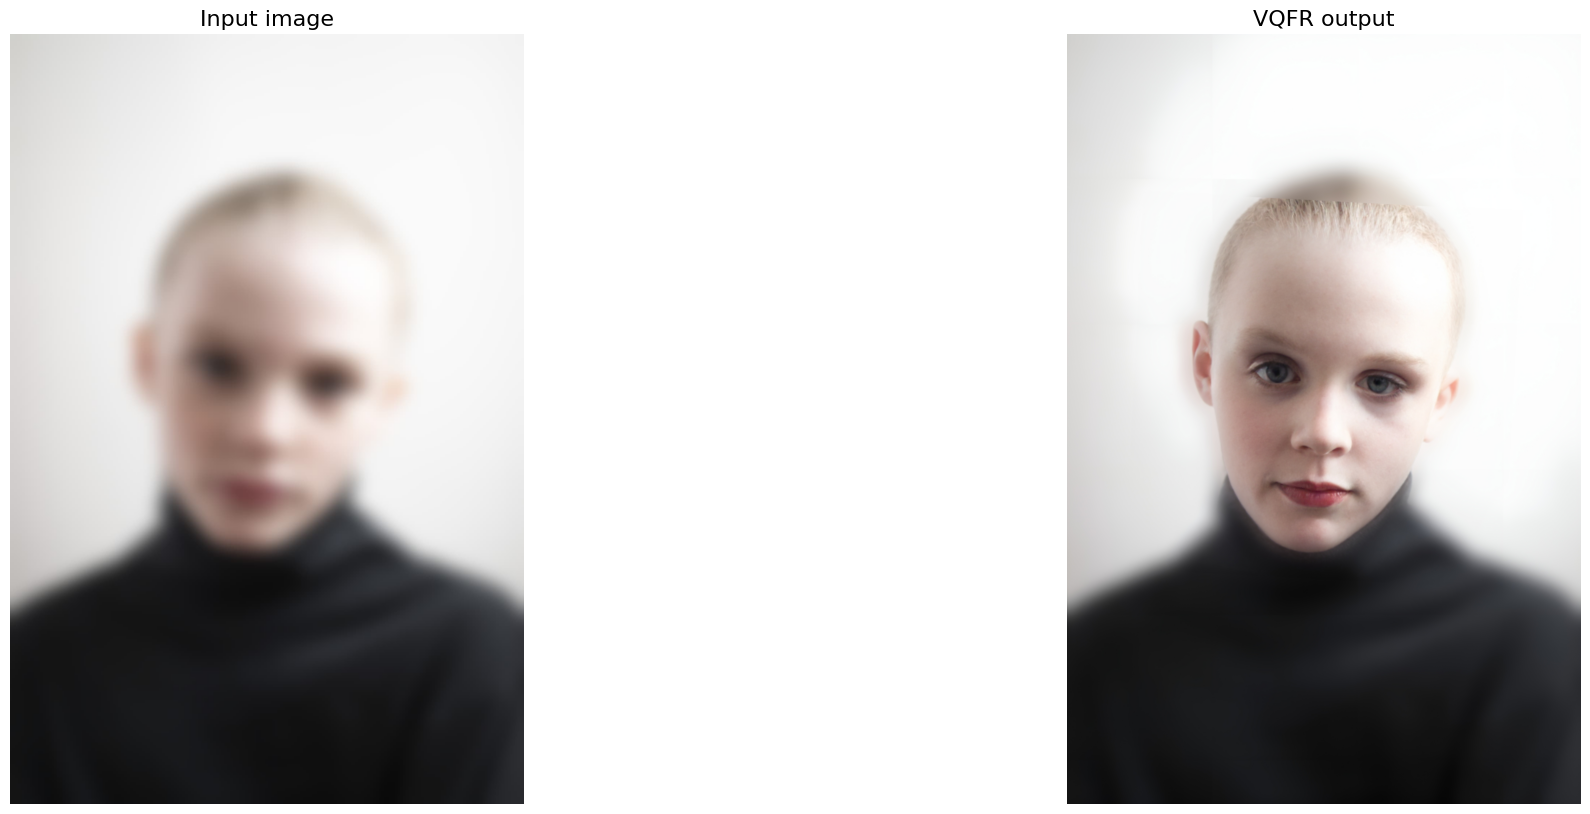

In [ ]:
# display each image in the upload folder
import os
import glob

input_folder = 'inputs/upload/userinput'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)